In [30]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

# knn with SC scores. May want to try other classification approaches but starting here. 

from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer

C:\Users\erroden\AppData\Local\Continuum\anaconda3\envs\mlg_2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\erroden\AppData\Local\Continuum\anaconda3\envs\mlg_2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Original Sources
'''
airline = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv")
airport = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airport.csv")
lounge = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/lounge.csv")
seat = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/seat.csv")
'''

'\nairline = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airline.csv")\nairport = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airport.csv")\nlounge = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/lounge.csv")\nseat = pd.read_csv("https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/seat.csv")\n'

In [3]:
# Set up file read/folder structure
os.chdir("C:\\Users\\erroden\\Desktop\\ML_Guild\\mlg_02_us\\Capstone")

# Local Sources
# Initial focus will be on the airline data set but others may be stitched on to enrich the data
airline = pd.read_csv("data\\airline.csv")

airport = pd.read_csv("data\\airport.csv")
lounge = pd.read_csv("data\\lounge.csv")
seat = pd.read_csv("data\\seat.csv")

In [4]:
# Print some summary numbers to get a feel for the data

In [5]:
list(airline)

['airline_name',
 'link',
 'title',
 'author',
 'author_country',
 'date',
 'content',
 'aircraft',
 'type_traveller',
 'cabin_flown',
 'route',
 'overall_rating',
 'seat_comfort_rating',
 'cabin_staff_rating',
 'food_beverages_rating',
 'inflight_entertainment_rating',
 'ground_service_rating',
 'wifi_connectivity_rating',
 'value_money_rating',
 'recommended']

In [6]:
len(airline)

41396

In [7]:
airline.describe()

overall_rating  seat_comfort_rating  cabin_staff_rating  \
count    36861.000000         33706.000000        33708.000000   
mean         6.039527             3.094612            3.319212   
std          3.214680             1.405515            1.541307   
min          1.000000             0.000000            0.000000   
25%          3.000000             2.000000            2.000000   
50%          7.000000             3.000000            4.000000   
75%          9.000000             4.000000            5.000000   
max         10.000000             5.000000            5.000000   

       food_beverages_rating  inflight_entertainment_rating  \
count           33264.000000                   31114.000000   
mean                2.805886                       2.392364   
std                 1.580246                       1.704753   
min                 0.000000                       0.000000   
25%                 1.000000                       1.000000   
50%                 3.000000                       2.000000   
75%                 4.000000                       4.000000   
max                 5.000000                       5.000000   

       ground_service_rating  wifi_connectivity_rating  value_money_rating  \
count            2203.000000                565.000000        39723.000000   
mean                2.736723                  2.249558            3.164111   
std                 1.569073                  1.541283            1.523486   
min                 1.000000                  1.000000            0.000000   
25%                 1.000000                  1.000000            2.000000   
50%                 3.000000                  1.000000            4.000000   
75%                 4.000000                  4.000000            4.000000   
max                 5.000000                  5.000000            5.000000   

        recommended  
count  41396.000000  
mean       0.533820  
std        0.498861  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
airline_name                     41396 non-null object
link                             41396 non-null object
title                            41396 non-null object
author                           41396 non-null object
author_country                   39805 non-null object
date                             41396 non-null object
content                          41396 non-null object
aircraft                         1278 non-null object
type_traveller                   2378 non-null object
cabin_flown                      38520 non-null object
route                            2341 non-null object
overall_rating                   36861 non-null float64
seat_comfort_rating              33706 non-null float64
cabin_staff_rating               33708 non-null float64
food_beverages_rating            33264 non-null float64
inflight_entertainment_rating    31114 non-null float64
ground_se

In [9]:
airline.content.describe()

count                                                 41396
unique                                                41362
top       If you experience any problems submitting comm...
freq                                                      5
Name: content, dtype: object

In [10]:
error_content = airline.content.describe().top

In [11]:
airline.loc[airline['content'] == error_content]

airline_name                                    link  \
13122      corendon-airlines      /airline-reviews/corendon-airlines   
21087              jetairfly              /airline-reviews/jetairfly   
23848  loch-lomond-seaplanes  /airline-reviews/loch-lomond-seaplanes   
26564            pal-express            /airline-reviews/pal-express   
41105         yangon-airways         /airline-reviews/yangon-airways   

                                       title           author author_country  \
13122      Corendon Airlines customer review     A Voorsluijs            NaN   
21087              Jetairfly customer review  Patrice Cleeren            NaN   
23848  Loch Lomond Seaplanes customer review          T Jeans            NaN   
26564            PAL Express customer review        A Mariner            NaN   
41105         Yangon Airways customer review     James Halley      Australia   

            date                                            content aircraft  \
13122   5/7/2008  If you experience any problems submitting comm...      NaN   
21087  9/14/2008  If you experience any problems submitting comm...      NaN   
23848  8/18/2008  If you experience any problems submitting comm...      NaN   
26564  5/31/2009  If you experience any problems submitting comm...      NaN   
41105   2/2/2009  If you experience any problems submitting comm...      NaN   

      type_traveller cabin_flown route  overall_rating  seat_comfort_rating  \
13122            NaN         NaN   NaN             NaN                  NaN   
21087            NaN         NaN   NaN             4.0                  NaN   
23848            NaN         NaN   NaN             NaN                  NaN   
26564            NaN         NaN   NaN             3.0                  NaN   
41105            NaN     Economy   NaN             8.0                  NaN   

       cabin_staff_rating  food_beverages_rating  \
13122                 NaN                    NaN   
21087                 NaN                    NaN   
23848                 NaN                    NaN   
26564                 NaN                    NaN   
41105                 NaN                    NaN   

       inflight_entertainment_rating  ground_service_rating  \
13122                            NaN                    NaN   
21087                            NaN                    NaN   
23848                            NaN                    NaN   
26564                            NaN                    NaN   
41105                            NaN                    NaN   

       wifi_connectivity_rating  value_money_rating  recommended  
13122                       NaN                 NaN            0  
21087                       NaN                 NaN            0  
23848                       NaN                 NaN            0  
26564                       NaN                 NaN            0  
41105                       NaN                 4.0            1

In [12]:
# 53% of reviewers recommended the airline providing a fairly even distribution of responses
np.average(airline.recommended) 

0.5338196927239347

In [13]:
# Add on text length as an extra data point - https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9
airline["text_len"] = airline.content.apply(len)

airline.head()

airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   
1  adria-airways  /airline-reviews/adria-airways   
2  adria-airways  /airline-reviews/adria-airways   
3  adria-airways  /airline-reviews/adria-airways   
4  adria-airways  /airline-reviews/adria-airways   

                           title        author author_country       date  \
0  Adria Airways customer review         D Ito        Germany  4/10/2015   
1  Adria Airways customer review  Ron Kuhlmann  United States   1/5/2015   
2  Adria Airways customer review       E Albin    Switzerland  9/14/2014   
3  Adria Airways customer review  Tercon Bojan      Singapore   9/6/2014   
4  Adria Airways customer review       L James         Poland  6/16/2014   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   
1  Two short hops ZRH-LJU and LJU-VIE. Very fast ...      NaN            NaN   
2  Flew Zurich-Ljubljana on JP365 newish CRJ900. ...      NaN            NaN   
3  Adria serves this 100 min flight from Ljubljan...      NaN            NaN   
4  WAW-SKJ Economy. No free snacks or drinks on t...      NaN            NaN   

      cabin_flown    ...    overall_rating  seat_comfort_rating  \
0         Economy    ...               7.0                  4.0   
1  Business Class    ...              10.0                  4.0   
2         Economy    ...               9.0                  5.0   
3  Business Class    ...               8.0                  4.0   
4         Economy    ...               4.0                  4.0   

   cabin_staff_rating  food_beverages_rating  inflight_entertainment_rating  \
0                 4.0                    4.0                            0.0   
1                 5.0                    4.0                            1.0   
2                 5.0                    4.0                            0.0   
3                 4.0                    3.0                            1.0   
4                 2.0                    1.0                            2.0   

   ground_service_rating  wifi_connectivity_rating  value_money_rating  \
0                    NaN                       NaN                 4.0   
1                    NaN                       NaN                 5.0   
2                    NaN                       NaN                 5.0   
3                    NaN                       NaN                 4.0   
4                    NaN                       NaN                 2.0   

   recommended  text_len  
0            1       424  
1            1       141  
2            1       249  
3            1       439  
4            0       675  

[5 rows x 21 columns]

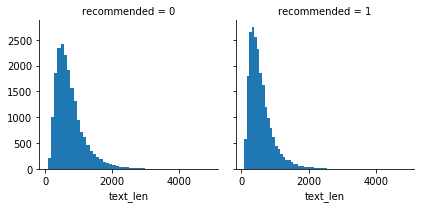

In [14]:
# visualize how words compare with recommended

g = sns.FacetGrid(data=airline, col='recommended')
g.map(plt.hist, 'text_len', bins=50)

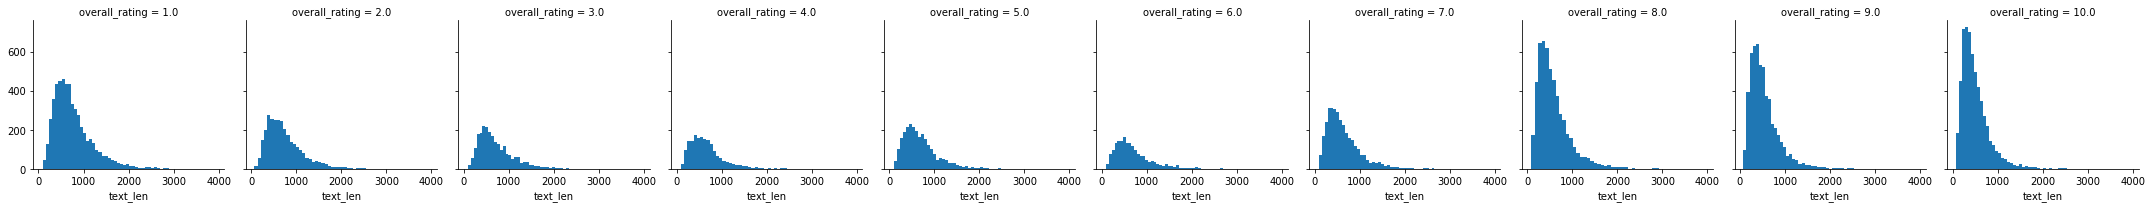

In [15]:
# visualize how words compare with recommended overall_rating

g = sns.FacetGrid(data=airline, col='overall_rating')
g.map(plt.hist, 'text_len', bins=50)

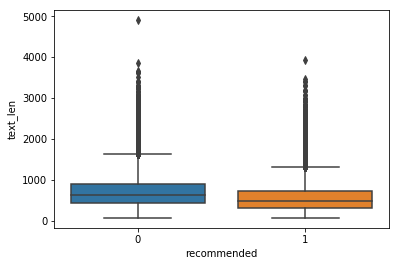

In [16]:
# A further look at both of these
sns.boxplot(x='recommended', y='text_len', data=airline)

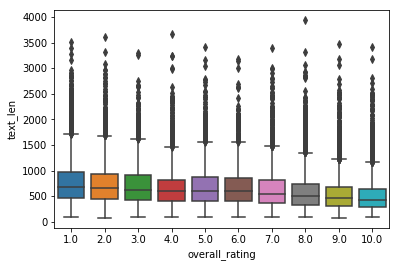

In [17]:
# A further look at both of these
sns.boxplot(x='overall_rating', y='text_len', data=airline)

In [18]:
rating = airline.groupby('overall_rating').mean()
rating.corr()

seat_comfort_rating  cabin_staff_rating  \
seat_comfort_rating                       1.000000            0.997597   
cabin_staff_rating                        0.997597            1.000000   
food_beverages_rating                     0.996969            0.996104   
inflight_entertainment_rating             0.996780            0.990635   
ground_service_rating                     0.997527            0.996503   
wifi_connectivity_rating                  0.961589            0.948365   
value_money_rating                        0.991270            0.996565   
recommended                               0.937704            0.955958   
text_len                                 -0.978575           -0.967315   

                               food_beverages_rating  \
seat_comfort_rating                         0.996969   
cabin_staff_rating                          0.996104   
food_beverages_rating                       1.000000   
inflight_entertainment_rating               0.995369   
ground_service_rating                       0.993302   
wifi_connectivity_rating                    0.955733   
value_money_rating                          0.985736   
recommended                                 0.946341   
text_len                                   -0.980754   

                               inflight_entertainment_rating  \
seat_comfort_rating                                 0.996780   
cabin_staff_rating                                  0.990635   
food_beverages_rating                               0.995369   
inflight_entertainment_rating                       1.000000   
ground_service_rating                               0.993315   
wifi_connectivity_rating                            0.967993   
value_money_rating                                  0.979918   
recommended                                         0.919952   
text_len                                           -0.984685   

                               ground_service_rating  \
seat_comfort_rating                         0.997527   
cabin_staff_rating                          0.996503   
food_beverages_rating                       0.993302   
inflight_entertainment_rating               0.993315   
ground_service_rating                       1.000000   
wifi_connectivity_rating                    0.954546   
value_money_rating                          0.992987   
recommended                                 0.938415   
text_len                                   -0.971808   

                               wifi_connectivity_rating  value_money_rating  \
seat_comfort_rating                            0.961589            0.991270   
cabin_staff_rating                             0.948365            0.996565   
food_beverages_rating                          0.955733            0.985736   
inflight_entertainment_rating                  0.967993            0.979918   
ground_service_rating                          0.954546            0.992987   
wifi_connectivity_rating                       1.000000            0.933682   
value_money_rating                             0.933682            1.000000   
recommended                                    0.883214            0.959069   
text_len                                      -0.956189           -0.949256   

                               recommended  text_len  
seat_comfort_rating               0.937704 -0.978575  
cabin_staff_rating                0.955958 -0.967315  
food_beverages_rating             0.946341 -0.980754  
inflight_entertainment_rating     0.919952 -0.984685  
ground_service_rating             0.938415 -0.971808  
wifi_connectivity_rating          0.883214 -0.956189  
value_money_rating                0.959069 -0.949256  
recommended                       1.000000 -0.882804  
text_len                         -0.882804  1.000000

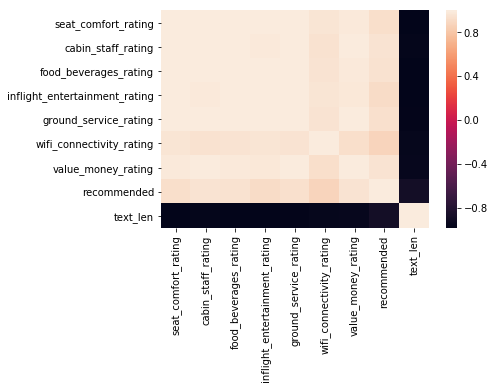

In [19]:
sns.heatmap(data=rating.corr(), annot=False)

In [20]:
''' *** This looks a bit odd. Not sure if this correlation is working as expected ***'''

' *** This looks a bit odd. Not sure if this correlation is working as expected ***'

**From here the idea would be to start topic modeling and sensitivity analysis. 

Outstanding Questions
* For sensitivity analysis does it makes sense to just train on recommend or not or would the overall rating be better since it isn't the prediction variable? Could use all 1 ratings and all 10 ratings as negative and positive samples. 
* What would be the best way to address the null values throughout? 
* Would it be better to try to add extra data now or should I use the airline data to get a baseline and then look to add data? 
* Are there other data prep considerations?

In [21]:
# generate tokens
airline['tokens'] = airline.content.apply(lambda x: x.split(" "))

airline['tokens'].head()

0    [Outbound, flight, FRA/PRN, A319., 2, hours, 1...
1    [Two, short, hops, ZRH-LJU, and, LJU-VIE., Ver...
2    [Flew, Zurich-Ljubljana, on, JP365, newish, CR...
3    [Adria, serves, this, 100, min, flight, from, ...
4    [WAW-SKJ, Economy., No, free, snacks, or, drin...
Name: tokens, dtype: object

In [22]:
stops = set(stopwords.words('english'))

In [23]:
airline['clean'] = airline['tokens'].apply(lambda x: [word for word in x if word not in stops])

In [24]:
airline['clean'] = airline['clean'].apply(lambda x: [word for word in x if re.search('^[a-zA-Z]+', word)])

In [25]:
# Lemmatizer 
lemmatizer = nltk.WordNetLemmatizer()

airline['clean'] = airline['clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [26]:
airline['ready'] =  airline['clean'].apply(lambda x: ' '.join(x))

In [27]:
airline.head()

airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   
1  adria-airways  /airline-reviews/adria-airways   
2  adria-airways  /airline-reviews/adria-airways   
3  adria-airways  /airline-reviews/adria-airways   
4  adria-airways  /airline-reviews/adria-airways   

                           title        author author_country       date  \
0  Adria Airways customer review         D Ito        Germany  4/10/2015   
1  Adria Airways customer review  Ron Kuhlmann  United States   1/5/2015   
2  Adria Airways customer review       E Albin    Switzerland  9/14/2014   
3  Adria Airways customer review  Tercon Bojan      Singapore   9/6/2014   
4  Adria Airways customer review       L James         Poland  6/16/2014   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   
1  Two short hops ZRH-LJU and LJU-VIE. Very fast ...      NaN            NaN   
2  Flew Zurich-Ljubljana on JP365 newish CRJ900. ...      NaN            NaN   
3  Adria serves this 100 min flight from Ljubljan...      NaN            NaN   
4  WAW-SKJ Economy. No free snacks or drinks on t...      NaN            NaN   

      cabin_flown                        ...                          \
0         Economy                        ...                           
1  Business Class                        ...                           
2         Economy                        ...                           
3  Business Class                        ...                           
4         Economy                        ...                           

  food_beverages_rating  inflight_entertainment_rating  ground_service_rating  \
0                   4.0                            0.0                    NaN   
1                   4.0                            1.0                    NaN   
2                   4.0                            0.0                    NaN   
3                   3.0                            1.0                    NaN   
4                   1.0                            2.0                    NaN   

   wifi_connectivity_rating  value_money_rating  recommended  text_len  \
0                       NaN                 4.0            1       424   
1                       NaN                 5.0            1       141   
2                       NaN                 5.0            1       249   
3                       NaN                 4.0            1       439   
4                       NaN                 2.0            0       675   

                                              tokens  \
0  [Outbound, flight, FRA/PRN, A319., 2, hours, 1...   
1  [Two, short, hops, ZRH-LJU, and, LJU-VIE., Ver...   
2  [Flew, Zurich-Ljubljana, on, JP365, newish, CR...   
3  [Adria, serves, this, 100, min, flight, from, ...   
4  [WAW-SKJ, Economy., No, free, snacks, or, drin...   

                                               clean  \
0  [Outbound, flight, FRA/PRN, A319., hour, min, ...   
1  [Two, short, hop, ZRH-LJU, LJU-VIE., Very, fas...   
2  [Flew, Zurich-Ljubljana, JP365, newish, CRJ900...   
3  [Adria, serf, min, flight, Ljubljana, Amsterda...   
4  [WAW-SKJ, Economy., No, free, snack, drink, St...   

                                               ready  
0  Outbound flight FRA/PRN A319. hour min flight....  
1  Two short hop ZRH-LJU LJU-VIE. Very fast CRJ S...  
2  Flew Zurich-Ljubljana JP365 newish CRJ900. Fli...  
3  Adria serf min flight Ljubljana Amsterdam bran...  
4  WAW-SKJ Economy. No free snack drink Star Alli...  

[5 rows x 24 columns]

In [40]:
# Vectorize and fit the model

from sklearn.feature_extraction.text import TfidfVectorizer

# parameters set to try to reduce features space to something that won't crash my computer
tfidf = TfidfVectorizer(max_df = .7, min_df=.1)

# running on portion of population to try to get results to work
X = tfidf.fit_transform(airline['ready'].sample(frac=.3))

In [41]:
X.shape # figure out how many words are left in the matrix

(12419, 76)

In [45]:
# calculate SC for K=2 through K=40
k_range = range(2, 41,1)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1, n_jobs=-1, algorithm="auto", n_init=5, )
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))
    print("{} completed".format((k)))

2 completed
3 completed
4 completed
5 completed
6 completed
7 completed
8 completed
9 completed
10 completed
11 completed
12 completed
13 completed
14 completed
15 completed
16 completed
17 completed
18 completed
19 completed
20 completed
21 completed
22 completed
23 completed
24 completed
25 completed
26 completed
27 completed
28 completed
29 completed
30 completed
31 completed
32 completed
33 completed
34 completed
35 completed
36 completed
37 completed
38 completed
39 completed
40 completed


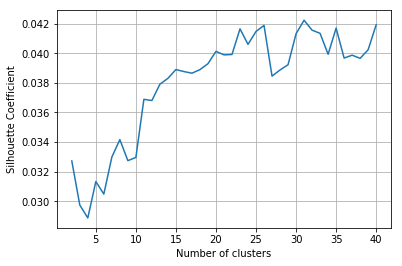

In [46]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)